Configuration

log_path (path): path to the XES File

use_networkx (bool): output via NetworkX or Pyvis

filter_timeframe (bool): filter the timeframe of the traces
filter_timeframe_intersecting (bool): use intersecting or contained
filter_timeframe_start (dateTime): start of the Timeframe
filter_timeframe_end (dateTime): end of the Timeframe

filter_performance (bool): filter on Traceperformance
filter_performance_min (int): minimum seconds of trace actions
filter_performance_max (int): maximum seconds of trace actions

In [ ]:
log_path = 'data/BPI_Challenge_2017_Offer_log.xes'

use_networkx = True

filter_timeframe = True
filter_timeframe_intersecting  = False
filter_timeframe_start = "2011-03-09 00:00:00"
filter_timeframe_end = "2011-03-09 00:00:00"

filter_performance = False
filter_performance_min = 0
filter_performance_max = 864000

Allgemeiner Importskript

In [11]:
import shutil
from pm4py.objects.log.importer.xes import importer as xes_importer

from pm4py.algo.organizational_mining.sna import algorithm as sna
from pm4py.visualization.sna import visualizer as sna_visualizer
from pm4py.algo.organizational_mining.roles import algorithm as roles_discovery
from pm4py.algo.organizational_mining.sna import util
import pm4py
import os
from pm4py.algo.organizational_mining.local_diagnostics import algorithm as local_diagnostics

log = xes_importer.apply(log_path)

parsing log, completed traces ::   0%|          | 0/42995 [00:00<?, ?it/s]

*Similar Activities
Berechtet wie ähnlich die aktivitäten der Benutzer sind

Ergebnis: result/similar_activities.html

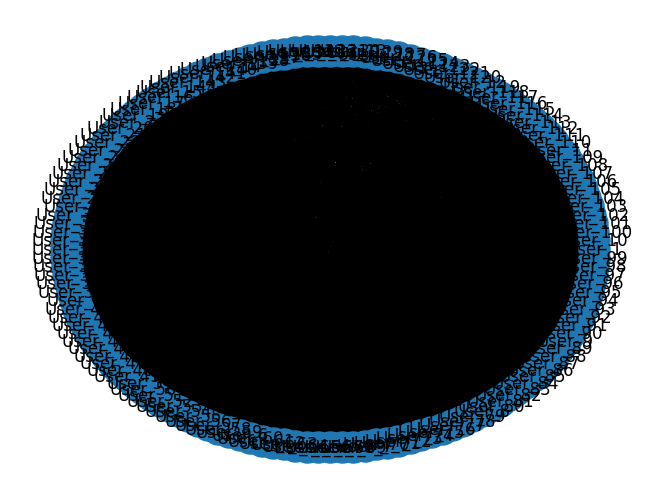

In [12]:
sa_metric  = sna.apply(log, variant=sna.Variants.JOINTACTIVITIES_LOG)
gviz_ja_py = sna_visualizer.apply(sa_metric , variant=sna_visualizer.Variants.NETWORKX)
sna_visualizer.view(gviz_ja_py, variant=sna_visualizer.Variants.NETWORKX)

Discover Roles

In [13]:
roles = roles_discovery.apply(log)
print([x for x in roles])

[[['O_Accepted'], {'User_95': 438, 'User_29': 1710, 'User_90': 1147, 'User_115': 744, 'User_87': 749, 'User_119': 333, 'User_99': 616, 'User_117': 306, 'User_30': 970, 'User_109': 1235, 'User_114': 64, 'User_113': 352, 'User_75': 1036, 'User_112': 362, 'User_118': 766, 'User_68': 971, 'User_116': 191, 'User_102': 943, 'User_120': 157, 'User_127': 105, 'User_121': 220, 'User_125': 178, 'User_83': 561, 'User_2': 1, 'User_128': 219, 'User_107': 424, 'User_122': 95, 'User_126': 43, 'User_27': 181, 'User_123': 214, 'User_129': 367, 'User_100': 914, 'User_133': 115, 'User_93': 138, 'User_31': 181, 'User_131': 66, 'User_134': 72, 'User_53': 18, 'User_106': 25, 'User_137': 1}], [['O_Cancelled'], {'User_17': 112, 'User_1': 9982, 'User_29': 603, 'User_19': 67, 'User_38': 75, 'User_27': 76, 'User_3': 203, 'User_8': 10, 'User_87': 244, 'User_119': 150, 'User_20': 35, 'User_95': 143, 'User_112': 138, 'User_2': 158, 'User_89': 1, 'User_115': 177, 'User_9': 16, 'User_75': 375, 'User_113': 162, 'User_

Handover of Work

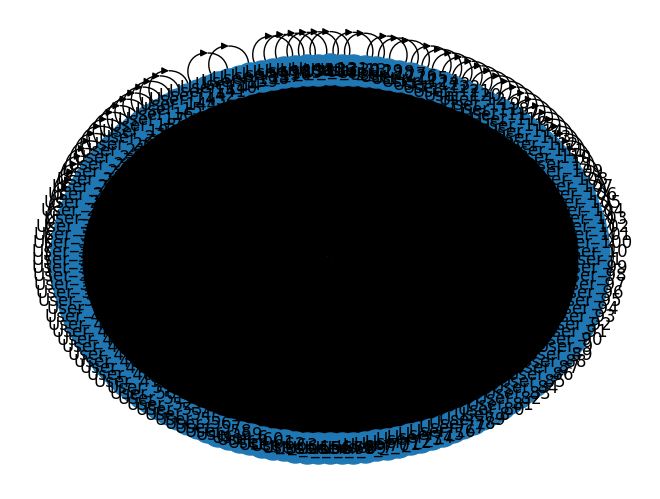

In [14]:
hw_values = sna.apply(log, variant=sna.Variants.HANDOVER_LOG)
gviz_hw_py = sna_visualizer.apply(hw_values, variant=sna_visualizer.Variants.NETWORKX)
sna_visualizer.view(gviz_hw_py, variant=sna_visualizer.Variants.NETWORKX)

CLuster Similar Activities into groups
Clustering the results of the similar activities metric, individuals that work on the same tasks would be inserted in the same group.


In [15]:
clustering_sa = util.cluster_affinity_propagation(sa_metric)
print(clustering_sa)

{'-1': ['User_1', 'User_10', 'User_100', 'User_101', 'User_102', 'User_103', 'User_104', 'User_105', 'User_106', 'User_107', 'User_108', 'User_109', 'User_11', 'User_110', 'User_111', 'User_112', 'User_113', 'User_114', 'User_115', 'User_116', 'User_117', 'User_118', 'User_119', 'User_12', 'User_120', 'User_121', 'User_122', 'User_123', 'User_124', 'User_125', 'User_126', 'User_127', 'User_128', 'User_129', 'User_13', 'User_130', 'User_131', 'User_132', 'User_133', 'User_134', 'User_135', 'User_136', 'User_137', 'User_138', 'User_139', 'User_14', 'User_140', 'User_141', 'User_142', 'User_143', 'User_144', 'User_15', 'User_16', 'User_17', 'User_18', 'User_19', 'User_2', 'User_20', 'User_21', 'User_22', 'User_23', 'User_24', 'User_25', 'User_26', 'User_27', 'User_28', 'User_29', 'User_3', 'User_30', 'User_31', 'User_32', 'User_33', 'User_34', 'User_35', 'User_36', 'User_37', 'User_38', 'User_39', 'User_4', 'User_40', 'User_41', 'User_42', 'User_43', 'User_44', 'User_45', 'User_46', 'User

c:\users\fabian harmsen\pycharmprojects\praxismodul1_pm4py\venv\lib\site-packages\sklearn\cluster\_affinity_propagation.py:250: ConvergenceWarning: Affinity propagation did not converge, this model will not have any cluster centers.
  warnings.warn(
c:\users\fabian harmsen\pycharmprojects\praxismodul1_pm4py\venv\lib\site-packages\sklearn\cluster\_affinity_propagation.py:528: ConvergenceWarning: This model does not have any cluster centers because affinity propagation did not converge. Labeling every sample as '-1'.
  warnings.warn(


Clustering the results of the working together metric, individuals that work often together would be inserted in the same group.

In [16]:
clustering_sa = util.cluster_affinity_propagation(hw_values)
print(clustering_sa)

{'4': ['User_1', 'User_100', 'User_101', 'User_102', 'User_103', 'User_104', 'User_105', 'User_106', 'User_107', 'User_108', 'User_109', 'User_110', 'User_111', 'User_114', 'User_115', 'User_124', 'User_125', 'User_127', 'User_128', 'User_129', 'User_13', 'User_130', 'User_131', 'User_132', 'User_133', 'User_134', 'User_135', 'User_136', 'User_137', 'User_138', 'User_139', 'User_140', 'User_141', 'User_142', 'User_143', 'User_144', 'User_20', 'User_22', 'User_23', 'User_25', 'User_26', 'User_29', 'User_30', 'User_31', 'User_33', 'User_34', 'User_43', 'User_45', 'User_47', 'User_50', 'User_54', 'User_55', 'User_58', 'User_59', 'User_6', 'User_62', 'User_63', 'User_64', 'User_65', 'User_66', 'User_68', 'User_69', 'User_70', 'User_72', 'User_73', 'User_74', 'User_75', 'User_76', 'User_77', 'User_79', 'User_8', 'User_80', 'User_81', 'User_82', 'User_83', 'User_84', 'User_85', 'User_86', 'User_87', 'User_88', 'User_89', 'User_9', 'User_90', 'User_91', 'User_92', 'User_93', 'User_94', 'User_

In [17]:
# this applies the organizational mining from an attribute that is in each event, describing the group that is performing the task.
ld = local_diagnostics.apply_from_group_attribute(log)
# GROUP RELATIVE FOCUS (on a given type of work) specifies how much a resource group performed this type of work
# compared to the overall workload of the group. It can be used to measure how the workload of a resource group
# is distributed over different types of work, i.e., work diversification of the group.
print("\ngroup_relative_focus")
print(ld["group_relative_focus"])
# GROUP RELATIVE STAKE (in a given type of work) specifies how much this type of work was performed by a certain
# resource group among all groups. It can be used to measure how the workload devoted to a certain type of work is
# distributed over resource groups in an organizational model, i.e., work participation by different groups.
print("\ngroup_relative_stake")
print(ld["group_relative_stake"])
# GROUP COVERAGE with respect to a given type of work specifies the proportion of members of a resource group that
# performed this type of work.
print("\ngroup_coverage")
print(ld["group_coverage"])
# GROUP MEMBER CONTRIBUTION of a member of a resource group with respect to the given type of work specifies how
# much of this type of work by the group was performed by the member. It can be used to measure how the workload
# of the entire group devoted to a certain type of work is distributed over the group members.
print("\ngroup_member_contribution")
print(ld["group_member_contribution"])


group_relative_focus
{}

group_relative_stake
{}

group_coverage
{}

group_member_contribution
{}
